# Chapter 3 模型搭建和评估

## 第一节 建模

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from IPython.display import Image

In [2]:
%matplotlib inline

In [3]:
plt.rcParams['font.sans-serif']=['SimHei'] #用来正常显示中文标签
plt.rcParams['axes.unicode_minus']=False #用来正常显示正负号
plt.rcParams['figure.figsize']=(10,6) #设置输出图片大小

In [4]:
#读取原来的数据集
train=pd.read_csv('/Users/linjiaxi/Desktop/kaggle/Titanic - Machine Learning from Disaster/titanic_data/train.csv')
train.shape

(891, 12)

In [5]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [13]:
#读取清洗过的数据
data=pd.read_csv('/Users/linjiaxi/Desktop/学习/hands on data analysis/chapter 3/clear_data.csv')

In [14]:
data.head()

,PassengerId,Pclass,Age,SibSp,Parch,Fare,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S
0,0,3,22.0,1,0,7.2500,0,1,0,0,1
1,1,1,38.0,1,0,71.2833,1,0,1,0,0
2,2,3,26.0,0,0,7.9250,1,0,0,0,1
3,3,1,35.0,1,0,53.1000,1,0,0,0,1
4,4,3,35.0,0,0,8.0500,0,1,0,0,1


### 任务一：切割训练集和测试集
这里使用留出法划分数据集

* 将数据集分为自变量和因变量
* 按比例切割训练集和测试集(一般测试集的比例有30%、25%、20%、15%和10%)
* 使用分层抽样
* 设置随机种子以便结果能复现

In [15]:
from sklearn.model_selection import train_test_split

In [19]:
X=data
y=train['Survived']

In [20]:
X_train,X_test,y_train,y_test=train_test_split(X,y,stratify=y,random_state=0)

In [21]:
X_train.shape,X_test.shape

((668, 11), (223, 11))

### 任务二：模型创建

* 创建基于线性模型的分类模型（逻辑回归）
* 创建基于树的分类模型（决策树、随机森林）
* 分别使用这些模型进行训练，分别的到训练集和测试集的得分
* 查看模型的参数，并更改参数值，观察模型变化

In [22]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier

#### `逻辑回归模型`

In [23]:
lr=LogisticRegression()
lr.fit(X_train,y_train)

/Users/linjiaxi/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [24]:
# 查看训练集和测试集score值
print("Training set score: {:.2f}".format(lr.score(X_train, y_train)))
print("Testing set score: {:.2f}".format(lr.score(X_test, y_test)))

Training set score: 0.80
Testing set score: 0.79


In [25]:
# 调整参数后的逻辑回归模型
lr2 = LogisticRegression(C=100)
lr2.fit(X_train, y_train)

/Users/linjiaxi/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(C=100)

In [26]:
print("Training set score: {:.2f}".format(lr2.score(X_train, y_train)))
print("Testing set score: {:.2f}".format(lr2.score(X_test, y_test)))

Training set score: 0.79
Testing set score: 0.78


#### `随机森林分类模型`

In [27]:
rfc=RandomForestClassifier()
rfc.fit(X_train,y_train)

RandomForestClassifier()

In [28]:
# 默认参数的随机森林分类模型
rfc = RandomForestClassifier()
rfc.fit(X_train, y_train)

RandomForestClassifier()

In [29]:
print("Training set score: {:.2f}".format(rfc.score(X_train, y_train)))
print("Testing set score: {:.2f}".format(rfc.score(X_test, y_test)))

Training set score: 1.00
Testing set score: 0.81


In [30]:
# 调整参数后的随机森林分类模型
rfc2 = RandomForestClassifier(n_estimators=100, max_depth=5)
rfc2.fit(X_train, y_train)

RandomForestClassifier(max_depth=5)

In [31]:
print("Training set score: {:.2f}".format(rfc2.score(X_train, y_train)))
print("Testing set score: {:.2f}".format(rfc2.score(X_test, y_test)))

Training set score: 0.86
Testing set score: 0.83


### 任务三：输出模型预测结果

* 输出模型预测分类标签
* 输出不同分类标签的预测概率

In [32]:
#预测标签
pred=lr.predict(X_train)
pred[:10]

array([0, 1, 1, 1, 0, 0, 1, 0, 1, 1])

In [33]:
#预测标签的概率
preb_proba=lr.predict_proba(X_train)
preb_proba[:10]

array([[0.60481088, 0.39518912],
       [0.18716701, 0.81283299],
       [0.41968941, 0.58031059],
       [0.19561358, 0.80438642],
       [0.87792116, 0.12207884],
       [0.91148624, 0.08851376],
       [0.13906319, 0.86093681],
       [0.90167134, 0.09832866],
       [0.05422319, 0.94577681],
       [0.10995194, 0.89004806]])

## 第二节 建模

* 模型评估是为了知道模型的泛化能力。
* 交叉验证（cross-validation）是一种评估泛化性能的统计学方法，它比单次划分训练集和测试集的方法更加稳定、全面。
* 在交叉验证中，数据被多次划分，并且需要训练多个模型。
* 最常用的交叉验证是 k 折交叉验证（k-fold cross-validation），其中 k 是由用户指定的数字，通常取 5 或 10。
* 准确率（precision）度量的是被预测为正例的样本中有多少是真正的正例
* 召回率（recall）度量的是正类样本中有多少被预测为正类
* f-分数是准确率与召回率的调和平均

### 任务一：交叉验证
* 用10折交叉验证来评估之前的逻辑回归模型
* 计算交叉验证精度的平均值

交叉验证（Cross-validation）是一种用于评估机器学习模型性能的常用技术。它通过将数据集分成多个子集，然后使用其中一个子集作为验证集，其余子集作为训练集，多次训练和验证模型，以获取更稳定和可靠的性能评估结果。

`交叉验证的基本原理`

1. 数据集划分：将原始数据集划分为k个互斥的子集，通常称为“折叠”（folds）或“块”（chunks）。

2. 训练和验证：对于每个折叠，将其中一个子集作为验证集，其余子集作为训练集。使用训练集对模型进行训练，然后使用验证集评估模型的性能。

3. 重复迭代：重复上述过程k次，每次选择不同的验证集。最常见的形式是k折交叉验证，其中每个子集都充当一次验证集。

4. 性能度量：对每次验证的结果进行评估，可以计算平均性能度量（例如准确率、精确度、召回率、F1得分等）作为模型的性能指标。

交叉验证的优势在于能够更全面地评估模型的性能，减少因数据划分的偶然性而引起的不确定性。它可以提供对模型在不同数据子集上的一般性能表现的更稳健估计。交叉验证还有助于识别模型是否存在过拟合或欠拟合的问题。

常见的交叉验证方法包括`k折交叉验证（k-fold cross-validation）、留一交叉验证（leave-one-out cross-validation）和留P交叉验证（leave-P-out cross-validation）`，可以根据问题的特点和数据集的大小选择适合的方法。


In [34]:
from sklearn.model_selection import cross_val_score
lr=LogisticRegression(C=100)
scores=cross_val_score(lr,X_train,y_train,cv=10)

/Users/linjiaxi/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/Users/linjiaxi/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html

In [35]:
#k折交叉验证分数
scores

array([0.80597015, 0.74626866, 0.74626866, 0.79104478, 0.86567164,
       0.8358209 , 0.76119403, 0.85074627, 0.74242424, 0.75757576])

In [36]:
#平均交叉验证分数
print('Average cross-validation score:{:.2f}'.format(scores.mean()))

Average cross-validation score:0.79


`当k折的数量增加时，会对交叉验证的性能评估产生以下影响：`

* 更准确的性能估计：增加k折的数量可以提供更准确的性能估计，因为每个折叠的验证集更大，更能代表整个数据集。这样可以减少因数据划分的偶然性而引起的评估结果的方差，使性能评估更可靠。

* 增加计算开销：随着k折的数量增加，需要训练和验证的模型数量也增加。这将导致更多的计算开销，因为需要进行更多次的训练和验证。特别是在数据集较大时，增加k折可能会导致较长的训练时间。

* 方差-偏差折衷：增加k折的数量可以更好地评估模型的方差和偏差之间的折衷关系。较小的k值可能会导致评估结果受到随机性的影响，而较大的k值则可以提供更多信息来评估模型的稳定性和泛化能力。

* 过拟合风险降低：增加k折的数量可以减少过拟合的风险。较小的k值可能会导致模型在每个折叠上过于拟合，而较大的k值可以提供更多的验证集来验证模型的泛化能力，减少过拟合的可能性。

### 任务二：混淆矩阵

* 计算二分类问题的混淆矩阵
* 计算精确率、召回率以及f-分数

In [37]:
from sklearn.metrics import confusion_matrix

In [39]:
lr=LogisticRegression(C=100)
lr.fit(X_train,y_train)

/Users/linjiaxi/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(C=100)

In [41]:
pred=lr.predict(X_train)

In [42]:
confusion_matrix(y_train,pred)

array([[354,  58],
       [ 83, 173]])

In [43]:
from sklearn.metrics import classification_report

In [44]:
#精确率、召回率以及f1-score

In [45]:
print(classification_report(y_train,pred))

              precision    recall  f1-score   support

           0       0.81      0.86      0.83       412
           1       0.75      0.68      0.71       256

    accuracy                           0.79       668
   macro avg       0.78      0.77      0.77       668
weighted avg       0.79      0.79      0.79       668



#### `精确率（Precision）`<br>
分类模型在预测为正类的样本中，真正为正类的样本所占的比例。它衡量了模型对正类样本的准确性。<br>
<br>
精确率 = $ \frac{{TP}}{{TP + FP}} $
<br>
<br>
#### `召回率（Recall）`<br>
分类模型在所有正类样本中，预测为正类的样本所占的比例。它衡量了模型对正类样本的覆盖程度。<br>
<br>
召回率 = $ \frac{{TP}}{{TP + FN}} $
<br>
<br>
#### `F1 分数（F1-score）`<br>
精确率和召回率的调和平均值，用于综合评估模型的性能。它综合考虑了模型的准确性和覆盖性能，并提供了一个单一的指标来评估分类器的整体表现。

F1 分数 = $ \frac{{2 \times \text{{精确率}} \times \text{{召回率}}}}{{\text{{精确率}} + \text{{召回率}}}} $

<br>
其中，TP（True Positive）是真正类样本的数量，FP（False Positive）是错误地预测为正类的负类样本数量，FN（False Negative）是错误地预测为负类的正类样本数量。


### 任务三：ROC曲线
* ROC曲线在sklearn中的模块为sklearn.metrics
* ROC曲线下面所包围的面积越大越好

In [46]:
from sklearn.metrics import roc_curve

findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans.
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei


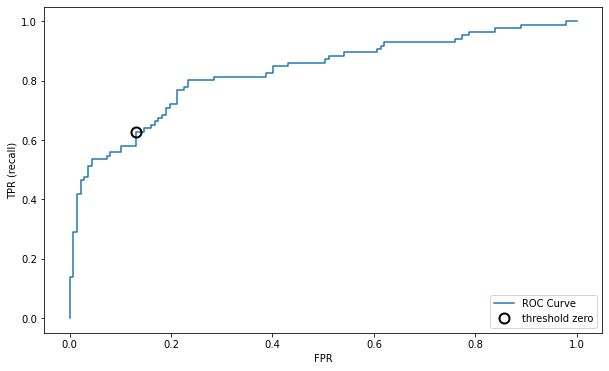

In [47]:
fpr,tpr,thresholds=roc_curve(y_test,lr.decision_function(X_test))
plt.plot(fpr,tpr,label='ROC Curve')
plt.xlabel('FPR')
plt.ylabel('TPR (recall)')
# 找到最接近于0的阈值
close_zero = np.argmin(np.abs(thresholds))
plt.plot(fpr[close_zero], tpr[close_zero], 'o', markersize=10, label="threshold zero", fillstyle="none", c='k', mew=2)
plt.legend(loc=4)

#### ROC曲线
通过绘制模型在不同分类阈值下的真阳性率与假阳性率之间的关系而得到的曲线。它是评估二分类模型性能的常用工具。

* `横轴`<br>
为假阳性率（FPR），表示被错误地预测为正类的负类样本占所有负类样本的比例。

* `纵轴`<br>
为真阳性率（TPR），也称为召回率（Recall），表示被正确地预测为正类的正类样本占所有正类样本的比例。

#### ROC曲线的绘制过程
对于不同的分类阈值，计算出对应的真阳性率和假阳性率，并将它们绘制在坐标系中。通过改变分类阈值，可以得到不同的点，连接这些点即可得到ROC曲线。

一般而言，ROC曲线越靠近左上角，模型的性能越好。对于随机分类器，ROC曲线接近对角线，性能较差；而对于完美分类器，ROC曲线会达到左上角，性能最佳。

除了绘制ROC曲线，还可以使用曲线下面积（AUC，Area Under the Curve）作为评估指标。AUC值越接近1，模型的性能越好。
